In [1]:
import pandas as pd
import numpy as np
import os
import re
from quasinet.qnet import Qnet, qdistance, membership_degree, export_qnet_tree,load_qnet, qdistance_matrix, save_qnet
from quasinet.qsampling import qsample, targeted_qsample
import subprocess
EMBED='/home/ishanu/Dropbox/ZED/Research/data_smashing_/bin/embed '
import seaborn as sns
import random
from tqdm import tqdm
from pqdm.processes import pqdm                                                                     
from sklearn import metrics
import pylab as plt
from sklearn.decomposition import PCA
from scipy.stats import entropy

In [2]:
OUTPUTDIR='./bondcourtdata/results/'
REGEN=False

+ Columns with atleast one non-nan  45
+ Max alphabet 4
mean response time:  8.500173076923078 s
mean number of responses:  29.0


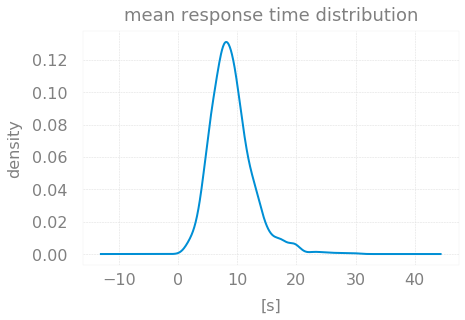

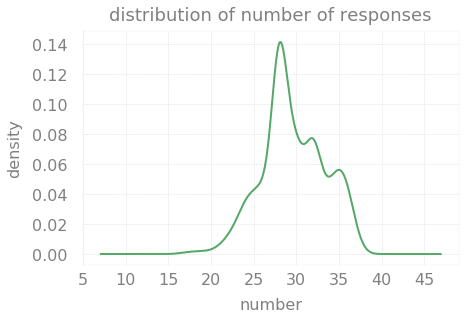

In [276]:
# read data
sns.set()
plt.style.use('fivethirtyeight')
data=pd.read_csv('./bondcourtdata/CCHHS_SUD_details.csv',index_col=0).dropna(axis=1,how='all')\
                .fillna(1000).astype(int).replace(1000,'')
COLS=data.columns
IDS=data.index
# durations record
fig=plt.figure()
dur=pd.read_csv('./bondcourtdata/CCHHS_SUD_durations.csv',index_col=0).dropna(axis=1,how='all')
ax=dur.mean(axis=1).plot.kde(lw=2)
print('+ Columns with atleast one non-nan ',len(COLS))
print('+ Max alphabet',data.max(axis=1).max())


ax.set_title('mean response time distribution',fontsize=18,y=1.02,color='.5')
plt.setp(ax.get_xticklabels(), fontsize=16,y=-.02)
plt.setp(ax.get_yticklabels(), fontsize=16)
#plt.setp(ax2.get_yticklabels(), fontsize=16)
#plt.gca().set_xlabel('% reduction in error', fontsize=16,color='.5')
ax.set_facecolor((1.0, 0.47, 0.42,0))
fig.set_facecolor((1,0,1,0))
ax.spines['bottom'].set_color('.75')
ax.spines['top'].set_color('.75') 
ax.spines['right'].set_color('.75')
ax.spines['left'].set_color('.75')
##ax.set_xlim(-100,100);
ax.grid(color='#dddddd', linestyle='--', linewidth=.5)
plt.setp(ax.spines.values(), linewidth=.1)
ax.tick_params(axis='x', colors='.5')    #setting up X-axis tick color to red
ax.tick_params(axis='y', colors='.5',pad=15)  #setting up Y-axis tick color to black
#ax.set_ylabel('density',fontsize=16,color='.5',labelpad=10)
#ax.legend(fontsize=16)
ax.set_ylabel('density',fontsize=16,color='.5',labelpad=10)
ax.set_xlabel('[s]',fontsize=16,color='.5',labelpad=10)
#ax.legend(fontsize=16)
plt.savefig(OUTPUTDIR+'durdist'+'.png',dpi=600,bbox_inches='tight',transparent=True)








fig=plt.figure()
ax=dur.isnull().sum(axis=1).plot.kde(color='g',lw=2)
print('mean response time: ',dur.mean(axis=1).median(),'s')
print('mean number of responses: ',dur.isnull().sum(axis=1).median())


ax.set_title('distribution of number of responses',fontsize=18,y=1.02,color='.5')
plt.setp(ax.get_xticklabels(), fontsize=16,y=-.02)
plt.setp(ax.get_yticklabels(), fontsize=16)
#plt.setp(ax2.get_yticklabels(), fontsize=16)
#plt.gca().set_xlabel('% reduction in error', fontsize=16,color='.5')
ax.set_facecolor((1.0, 0.47, 0.42,0))
fig.set_facecolor((1,0,1,0))
ax.spines['bottom'].set_color('.75')
ax.spines['top'].set_color('.75') 
ax.spines['right'].set_color('.75')
ax.spines['left'].set_color('.75')
##ax.set_xlim(-100,100);
ax.grid(color='#dddddd', linestyle='--', linewidth=.5)
plt.setp(ax.spines.values(), linewidth=.1)
ax.tick_params(axis='x', colors='.5')    #setting up X-axis tick color to red
ax.tick_params(axis='y', colors='.5',pad=15)  #setting up Y-axis tick color to black
#ax.set_ylabel('density',fontsize=16,color='.5',labelpad=10)
#ax.legend(fontsize=16)
ax.set_ylabel('density',fontsize=16,color='.5',labelpad=10)
ax.set_xlabel('number',fontsize=16,color='.5',labelpad=10)
#ax.legend(fontsize=16)
plt.savefig(OUTPUTDIR+'numresp'+'.png',dpi=600,bbox_inches='tight',transparent=True)


In [6]:
# get qnet formatted data
X = data.values.astype(str)
X

array([['1', '1', '', ..., '0', '0', '0'],
       ['', '2', '', ..., '0', '0', '0'],
       ['', '1', '', ..., '0', '0', '0'],
       ...,
       ['', '1', '', ..., '0', '0', '0'],
       ['', '2', '', ..., '0', '0', '0'],
       ['', '2', '', ..., '0', '0', '0']], dtype='<U1')

In [7]:
if REGEN:
    qnet = Qnet(n_jobs=12,feature_names=COLS,alpha=.2).fit(X)
    save_qnet(qnet,OUTPUTDIR+'qnet.joblib')
else:
    qnet=load_qnet(OUTPUTDIR+'qnet.joblib')

In [8]:
if REGEN:
    for idx, feature_name in enumerate(qnet.feature_names):
                export_qnet_tree(qnet, idx,
                os.path.join(OUTPUTDIR, '{}.dot'.format(feature_name)),
                outformat='graphviz', detailed_output=False)

In [9]:
#n=50
Nsteps=1000
index1=len(X)
X_=X

In [10]:
# generate distanec matrix
if REGEN:
    H=qdistance_matrix(X_,X_, qnet, qnet)
    pd.DataFrame(H).to_csv(OUTPUTDIR+'HMAT.csv',index=None,header=None,sep=' ')
    H.shape

In [11]:
# calculate sippl embedding
PREF=OUTPUTDIR
FILE='HMAT.csv'
DATAFILE=PREF+FILE#'data_'
EFILE=PREF+'_Eb1_'
DFILE=PREF+'_Db1_'
PCAEFILE=PREF+'_PEb1_'

In [12]:
if REGEN:
    STR=EMBED+' -f '+DATAFILE+' -E '+EFILE+' -D '+DFILE
    subprocess.call(STR,shell=True);

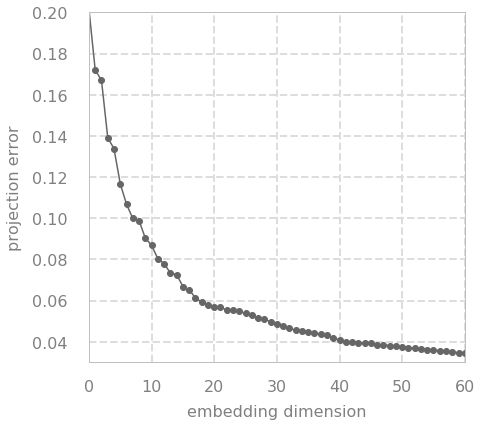

In [286]:
# plot dimensional error
fig=plt.figure(figsize=[6,6])
ax=plt.gca()
ax=pd.read_csv(DFILE,sep=' ',header=None).transpose().plot(ax=ax,style='-ko',c='.4')

ax.set_ylim(3e-2,2e-1)
ax.set_xlim(0,60)

plt.setp(ax.get_xticklabels(), fontsize=16,y=-.02)
plt.setp(ax.get_yticklabels(), fontsize=16)
ax.set_facecolor((1.0, 0.47, 0.42,0))
fig.set_facecolor((1,0,1,0))
ax.spines['bottom'].set_color('.75')
ax.spines['top'].set_color('.75') 
ax.spines['right'].set_color('.75')
ax.spines['left'].set_color('.75')
ax.grid(color='#dddddd', linestyle='--', linewidth=2)
plt.setp(ax.spines.values(), linewidth=1)
ax.tick_params(axis='x', colors='.5')    #setting up X-axis tick color to red
ax.tick_params(axis='y', colors='.5',pad=15)  #setting up Y-axis tick color to black
ax.set_ylabel('projection error',fontsize=16,color='.5',labelpad=10)
ax.set_xlabel('embedding dimension',fontsize=16,color='.5',labelpad=10)

l=ax.legend(['dimensional error'],fontsize=16)
l.remove()
    
plt.savefig(OUTPUTDIR+'emderror'+'.png',dpi=600,bbox_inches='tight',transparent=True)    

In [14]:
# get embedding matrix
E=pd.read_csv(EFILE,sep=' ',header=None).dropna(axis=1).transpose()
E.columns=['x'+str(i) for i in E.columns]
E.to_csv(PREF+'Eb1.csv')

In [277]:
Ef=pd.read_csv(EFILE,sep=' ',header=None).dropna(axis=1).transpose()
Ef.columns=['x'+str(i) for i in Ef.columns]
xf=Ef#.assign(IF=dx.ido)

pca = PCA(n_components=2).fit(xf)
ef=pca.fit_transform(xf)

pd.DataFrame(ef).to_csv(PCAEFILE,header=None,index=None)

#sns.scatterplot(x=ef[:,0],y=ef[:,1]);
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

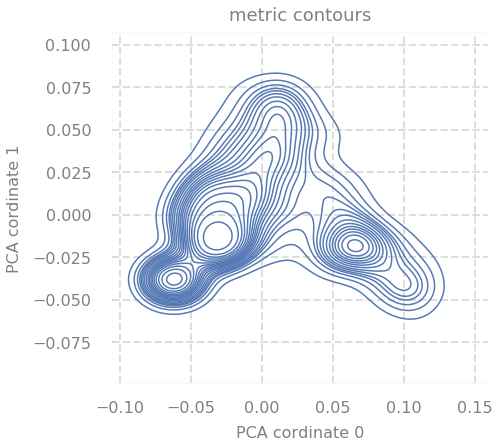

In [290]:
def varname(x):
    if x:
        return 'False'
    return 'True'
plt.style.use('fivethirtyeight')
fig=plt.figure(figsize=[6,6])
sns.set()

ax=plt.gca()

pf=pd.DataFrame(ef,columns=['X','Y'])#.assign(ido=LABEL)
#pf['dx']=(pf.ido==1)
#pf['dx']=[varname(x) for x in pf.dx]
ax=sns.kdeplot(x='X',y='Y',fill=False,data=pf,alpha=.95,lw=2,levels=20,thresh=.05,palette=['.5','r'],fontsize=16)

ax.set_title('metric contours',fontsize=18,y=1.02,color='.5')
plt.setp(ax.get_xticklabels(), fontsize=16,y=-.02)
plt.setp(ax.get_yticklabels(), fontsize=16)
#plt.setp(ax2.get_yticklabels(), fontsize=16)
#plt.gca().set_xlabel('% reduction in error', fontsize=16,color='.5')
ax.set_facecolor((1.0, 0.47, 0.42,0))
fig.set_facecolor((1,0,1,0))
ax.spines['bottom'].set_color('.75')
ax.spines['top'].set_color('.75') 
ax.spines['right'].set_color('.75')
ax.spines['left'].set_color('.75')
##ax.set_xlim(-100,100);
ax.grid(color='#dddddd', linestyle='--', linewidth=2)
plt.setp(ax.spines.values(), linewidth=.1)
ax.tick_params(axis='x', colors='.5')    #setting up X-axis tick color to red
ax.tick_params(axis='y', colors='.5',pad=15)  #setting up Y-axis tick color to black
#ax.set_ylabel('density',fontsize=16,color='.5',labelpad=10)
#ax.legend(fontsize=16)
ax.set_ylabel('PCA cordinate 1',fontsize=16,color='.5',labelpad=10)
ax.set_xlabel('PCA cordinate 0',fontsize=16,color='.5',labelpad=10)
#ax.legend(fontsize=16)


plt.savefig(OUTPUTDIR+'dxcontour'+'.png',dpi=600,bbox_inches='tight',transparent=True)

In [17]:
# the null response
s_null=['']*len(X[0])
D_null=qnet.predict_distributions(s_null)

In [18]:
def getMaskedSample(s,cols,mutable_vars,
                    mask_prob=0.5,
                    allow_all_mutable=False):
    '''
    Get random masked sample, with mask_prob fraction masked
    '''
    MUTABLE=pd.DataFrame(np.zeros(len(cols)),index=cols).transpose()
    WITHVAL=[x for x in cols[np.where(s)[0]] if x in mutable_vars ]
    MASKrand=[x for x in WITHVAL if random.random() > mask_prob ]
    for m in MASKrand:
        MUTABLE[m]=1.0
            
    mutable_x=MUTABLE.values[0]
    base_frequency=mutable_x/mutable_x.sum()
    
    s1=s.copy()
    for i in range(len(base_frequency)):
        if base_frequency[i]>0.0001:
            s1[i]=''
            
    s_rand=np.copy(s)
    rnd_match_prob=[]        
    max_match_prob=[]        
    D=qnet.predict_distributions(s)
    for i in MASKrand:
        s_rand[np.where(
            cols==i)[0][0]]=choose_one(
                D_null[np.where(cols==i)[0][0]].keys())
        rnd_match_prob=np.append(rnd_match_prob,1/len(
            D_null[np.where(cols==i)[0][0]].keys()))
        max_match_prob=np.append(
            max_match_prob,np.max(
                list(D[np.where(
                    cols==i)[0][0]].values())))
        
    if allow_all_mutable:
        for m in mutable_vars:
            MUTABLE[m]=1.0
        mutable_x=MUTABLE.values[0]
        base_frequency=mutable_x/mutable_x.sum()

    return s1,base_frequency,MASKrand,np.where(
        base_frequency)[0],np.mean(rnd_match_prob),np.mean(max_match_prob),s_rand

def choose_one(X):
    X=list(X)
    if len(X)>0:
        return X[np.random.randint(len(X))]
    return None

samples=None
def getRecon(index,MEAN=True):
    s=samples[index]
    
    s1,bp,mask_,maskindex,rmatch_u,rmatch,s_rand=getMaskedSample(s,cols,
                                                                     mutable_vars,
                                                                     mask_prob=MASKPROB)
    qs=qsample(s1,qnet,Nsteps,bp)
    recondf=pd.DataFrame([s,qs,s_rand],columns=cols,index=['s','q','r'])[mask_].transpose()
    recondf=recondf.replace('',np.nan).dropna(axis=0).astype(float)
    recondf['delta']=recondf.s-recondf.q
    if MEAN:
        return recondf.delta.mean()
    return recondf

In [19]:
# Reconstruction parameters
cols=qnet.feature_names
mutable_vars=cols
MASKPROB=0.10 #on avearge this means we mask all but 3 responses
Nsteps=120

In [20]:
if REGEN:
    samples=X_
    Recon=pqdm(range(len(X_)), getRecon, n_jobs=12)                                                              
    DF=pd.DataFrame(Recon,columns=['recon'])
    DF
    DF.to_csv(PREF+'Recon10.csv')
DF=pd.read_csv(PREF+'Recon10.csv',index_col=0)

mean positive dissonance:  0.41117292560165847 mean negative dissonance:  -0.21904200628615597


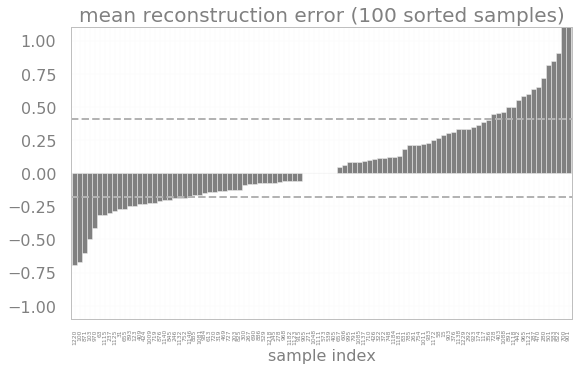

In [266]:
fig=plt.figure(figsize=[8,5])
sns.set()

plt.style.use('fivethirtyeight')
print('mean positive dissonance: ',DF[DF.recon>0].recon.mean(),
      'mean negative dissonance: ',DF[DF.recon<0].recon.mean())

ax=DF.sample(100).recon.sort_values().plot(kind='bar',color='.5',width=1)
ax.set_title('mean reconstruction error (100 sorted samples)',fontsize=20,color='.5');
#ax.legend(['error'],fontsize=18)
ax.set_ylim(-1.1,1.1)
ax.plot(ax.get_xlim(),DF[DF.recon>0].recon.mean()*np.array([1,1]),'--',lw=2,color='.7')
ax.plot(ax.get_xlim(),DF[DF.recon<=0].recon.mean()*np.array([1,1]),'--',lw=2,color='.7')

plt.setp(ax.get_xticklabels(), fontsize=6,y=-.02)
plt.setp(ax.get_yticklabels(), fontsize=16)
ax.set_facecolor((1.0, 0.47, 0.42,0))
fig.set_facecolor((1,1,1,0))
ax.spines['bottom'].set_color('.75')
ax.spines['top'].set_color('.75') 
ax.spines['right'].set_color('.75')
ax.spines['left'].set_color('.75')
ax.grid(color='#dddddd', linestyle='--', linewidth=.1)
plt.setp(ax.spines.values(), linewidth=1)
ax.tick_params(axis='x', colors='.5')    #setting up X-axis tick color to red
ax.tick_params(axis='y', colors='.5',pad=15)  #setting up Y-axis tick color to black
ax.set_xlabel('sample index',fontsize=16,color='.5')


plt.savefig(PREF+'recosntruction'+'.png',dpi=600,bbox_inches='tight',transparent=True)

## conclusions
+ we achieve small reconstruction error with a very few items revealed (2.5% or ~3 of the actual responses)
+ positive error (mean: 0.40) is more likely than negative (mean: -0.22, i.e. since pos => s>q, the actual responses tend to be higher magnitude compred to what is estimated by the model. So samples are over-diagnosing severity

In [22]:
def getDissonance(sample_index,index=None,MISSING_VAL=np.nan):                                  
    '''                                                                                               
    Dissonnace vector                                                                                                   
    '''  
    if isinstance(sample_index, int):
        s=samples[sample_index]                                                                           
    else:
        s=sample_index
    if index is None:                                                                                 
        index=range(len(s))                                                                           
                                                                                                      
    Ds=qnet.predict_distributions(s)                                                                  
                                                                                                      
    diss=np.ones(len(Ds))*MISSING_VAL                                                                 
    for i in index:                                                                                   
        if s[i] != '':                                                                                
            if s[i] in Ds[i].keys():                                                                  
                diss[i]=1-Ds[i][s[i]]/np.max(                                                         
                    list(Ds[i].values()))                                                             
            else:                                                                                     
                diss[i]=1.0                                                                           
                                                                                                      
    return diss                                                                        

In [23]:
samples=X
from pqdm.processes import pqdm                                                                     
Diss=pqdm(range(len(X)), getDissonance, n_jobs=12)                                                              
Diss=pd.DataFrame(Diss)

In [24]:
Diss.columns=COLS

In [25]:
diss_array=Diss.values.flatten()
duration_array=dur.values.flatten()
dissonance_duration=pd.DataFrame([diss_array,duration_array],index=['dissonance','duration']).transpose().dropna()

In [26]:
dd=dissonance_duration[(dissonance_duration.duration<25) & (dissonance_duration.dissonance>0)]
print('Correlation between mean dissonance and duration')
display(dd.corr())
dd.corr().to_csv('corr_mdiss_dur.csv')



Correlation between mean dissonance and duration


,dissonance,duration
dissonance,1.000000,0.099331
duration,0.099331,1.000000


In [28]:
# this is not correct
# we need to generate random responses using base frequency
s_null=['']*len(X[0])
D_null=qnet.predict_distributions(s_null)
D_rnd=[]
nullbp=[]
for i in range(len(X[0])):
    u,c=np.unique(X[:][i], return_counts=True)
    c=c/c.sum()
    D_rnd=np.append(D_rnd,dict(zip(u,c)))
    nullbp=np.append(nullbp,entropy(c,base=len(c)))

nullbp=nullbp/np.sum(nullbp)
def generateNullSample(D):
    choice_=[]
    for i in range(len(D)):
        keys=list(D[i].keys())
        last_=0
        rkey=np.random.random()
        for k in keys:
            last_=D[i][k]+last_
            if rkey <= last_:
                break
        choice_=np.append(choice_,k)
    return choice_
            

len(generateNullSample(D_rnd))

45

In [29]:
# generate random responses
Xrand=[generateNullSample(D_rnd) for i in range(1300)]

In [30]:
# compute dissonance for random responses
samples=Xrand
from pqdm.processes import pqdm                                                                     
Dissrand=pqdm(range(len(Xrand)), getDissonance, n_jobs=12)                                                              
Dissrand=pd.DataFrame(Dissrand)

In [31]:
Dissrand.columns=COLS

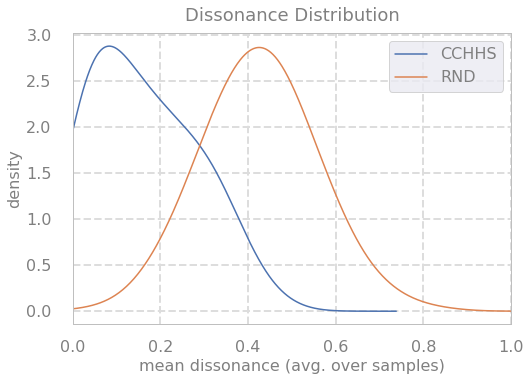

In [245]:
fig=plt.figure(figsize=[7,5])
sns.set()

ax=plt.gca()


#Dissj.mean(axis=1).plot.kde(bw_method=0.25,lw=3,label='JAIL')
#Diss.mean(axis=1).plot.kde(ax=ax,bw_method=0.25,lw=3,label='SA')
DS=pd.DataFrame(Diss.mean(axis=1),columns=['CCHHS']).join(
    pd.DataFrame(Dissrand.mean(axis=1),columns=['RND']))

DSTD=pd.DataFrame(Diss.std(axis=1),columns=['CCHHS']).join(
    pd.DataFrame(Dissrand.std(axis=1),columns=['RND']))

DS=DS.join(DSTD,rsuffix='_std').dropna()

#DS=DS.assign(delta=DS.SA-DS.JAIL)


ax=DS.CCHHS.plot.kde(bw_method=.5)
#DS.JAIL.plot.kde(ax=ax,bw_method=.2)
DS.RND.plot.kde(ax=ax,bw_method=.5)
ax.set_xlim(0,1)


ax.set_title('Dissonance Distribution',fontsize=18,y=1.02,color='.5')
plt.setp(ax.get_xticklabels(), fontsize=16,y=-.02)
plt.setp(ax.get_yticklabels(), fontsize=16)
ax.set_facecolor((1.0, 0.47, 0.42,0))
fig.set_facecolor((1,0,1,0))
ax.spines['bottom'].set_color('.75')
ax.spines['top'].set_color('.75') 
ax.spines['right'].set_color('.75')
ax.spines['left'].set_color('.75')
ax.grid(color='#dddddd', linestyle='--', linewidth=2)
plt.setp(ax.spines.values(), linewidth=1)
ax.tick_params(axis='x', colors='.5')    #setting up X-axis tick color to red
ax.tick_params(axis='y', colors='.5',pad=15)  #setting up Y-axis tick color to black
#plt.gca().set_xlim(-.1,.4)
ax.set_ylabel('density',fontsize=16,color='.5')
ax.set_xlabel('mean dissonance (avg. over samples)',fontsize=16,color='.5')
legend=ax.legend(fontsize=16)
for text in legend.get_texts():
    text.set_color(".5")
    text.set_fontsize(16)

plt.savefig(PREF+'dissonance_dist'+'.png',dpi=600,bbox_inches='tight',transparent=True)

Thershold (90%):  0.26483578156646526
Thershold (95%):  0.21910392534084694


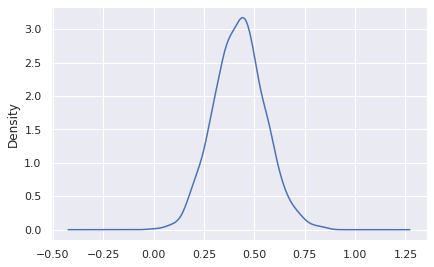

In [33]:
# determine threshold
Dissrand.mean(axis=1).plot.kde()
mRND=Dissrand.mean(axis=1).mean()
sRND=Dissrand.mean(axis=1).std(ddof=1)
from scipy import stats

# alpha to critical
alpha_p1 = 0.1
alpha_p05 = 0.05
n_sided = 1 # 2-sided test
z_crit = stats.norm.ppf(1-alpha_p1/n_sided)
threshold_p1=(-z_crit*sRND)+mRND

z_crit = stats.norm.ppf(1-alpha_p05/n_sided)
threshold_p05=(-z_crit*sRND)+mRND


print('Thershold (90%): ',threshold_p1)
print('Thershold (95%): ',threshold_p05)


In [34]:
# the "lying" samples at 5 and 10% significance
mDiss=Diss.mean(axis=1).sort_values(ascending=False)
print('95% ',mDiss[mDiss>threshold_p05])
print('90% ',mDiss[mDiss>threshold_p1])

95%  900     0.491918
1226    0.484263
346     0.469582
275     0.465557
243     0.465557
          ...   
532     0.223480
1223    0.223393
884     0.222579
401     0.220940
1032    0.219689
Length: 402, dtype: float64
90%  900     0.491918
1226    0.484263
346     0.469582
275     0.465557
243     0.465557
          ...   
731     0.266514
789     0.265459
871     0.265342
96      0.264959
667     0.264959
Length: 289, dtype: float64


In [35]:
DS=pd.DataFrame(Diss.mean(axis=0),columns=['CCHHS']).join(
    pd.DataFrame(Dissrand.mean(axis=0),columns=['RND']))
DSTD=pd.DataFrame(Diss.std(axis=0),columns=['CCHHS']).join(
    pd.DataFrame(Dissrand.std(axis=0),columns=['RND']))
DSn=pd.DataFrame(Diss.count(axis=0),columns=['CCHHS']).join(
    pd.DataFrame(Dissrand.count(axis=0),columns=['RND']))


DSs=DS.join(DSTD,rsuffix='_std').join(DSn,rsuffix='_n').dropna()
DSs.CCHHS_std=DSs.CCHHS_std/np.sqrt(DSs.CCHHS_n)
DSs.RND_std=DSs.RND_std/np.sqrt(DSs.RND_n)
DSs=DSs.assign(delta=(DSs.RND-DSs.CCHHS))
DSs=DSs.sort_values('delta',ascending=True)
DSs.head()

,CCHHS,RND,CCHHS_std,RND_std,CCHHS_n,RND_n,delta
6421,0.323845,0.207920,0.016714,0.018060,456,473,-0.115925
6319,0.230471,0.197187,0.011154,0.018016,1250,479,-0.033285
6399,0.238002,0.206004,0.019852,0.018378,346,483,-0.031998
6317,0.124204,0.149798,0.008571,0.016073,1250,494,0.025594
6409,0.235135,0.279310,0.011197,0.022340,799,376,0.044175


In [36]:
DSs.index.size

43

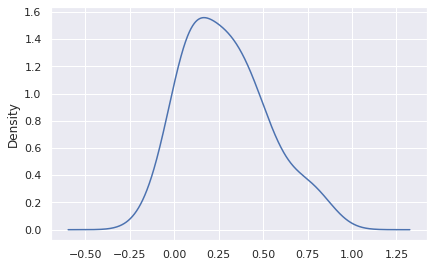

In [37]:
DSs.delta.plot.kde()

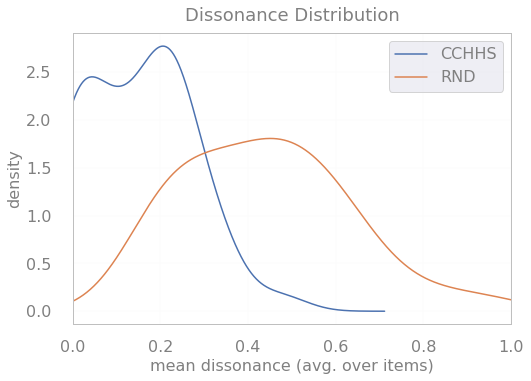

In [244]:
fig=plt.figure(figsize=[7,5])
sns.set()

ax=plt.gca()

ax=DSs.CCHHS.plot.kde(bw_method=.5)

DSs.RND.plot.kde(ax=ax,bw_method=.5)
ax.set_xlim(0,1)

ax.set_title('Dissonance Distribution',fontsize=18,y=1.02,color='.5')
plt.setp(ax.get_xticklabels(), fontsize=16,y=-.02)
plt.setp(ax.get_yticklabels(), fontsize=16)
ax.set_facecolor((1.0, 0.47, 0.42,0))
fig.set_facecolor((1,0,1,0))
ax.spines['bottom'].set_color('.75')
ax.spines['top'].set_color('.75') 
ax.spines['right'].set_color('.75')
ax.spines['left'].set_color('.75')
ax.grid(color='#dddddd', linestyle='--', linewidth=.1)
plt.setp(ax.spines.values(), linewidth=1)
ax.tick_params(axis='x', colors='.5')    #setting up X-axis tick color to red
ax.tick_params(axis='y', colors='.5',pad=15)  #setting up Y-axis tick color to black
#plt.gca().set_xlim(-.1,.4)
ax.set_ylabel('density',fontsize=16,color='.5')
ax.set_xlabel('mean dissonance (avg. over items)',fontsize=16,color='.5')
legend=ax.legend(fontsize=16)
for text in legend.get_texts():
    text.set_color(".5")
    text.set_fontsize(16)

plt.savefig(PREF+'dissonance_dist_items_nonnan'+'.png',dpi=600,bbox_inches='tight',transparent=True)

In [39]:
# identify the items with random-like dissonance


##  Note:  that ALT=False mostly for recon > 0, ie when the samples are "over-diagnosing"

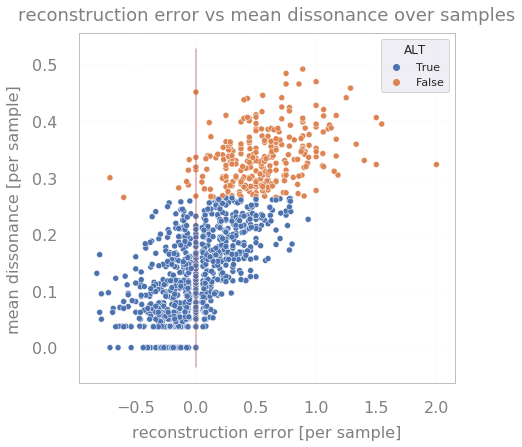

In [230]:
cf=DF.join(pd.DataFrame(Diss.mean(axis=1),columns=['mdiss']))
#cf.recon=cf.recon.abs()
cf['ALT']=(cf.mdiss>threshold_p1)
cf['ALT']=[varname(x) for x in cf.ALT]
fig=plt.figure(figsize=[6,6])
sns.set()

ax=plt.gca()

sns.scatterplot(x='recon',y='mdiss',data=cf,hue='ALT');

ax.set_title('reconstruction error vs mean dissonance over samples',
             fontsize=18,y=1.02,color='.5')
plt.plot([0,0],ax.get_ylim(),'-r',alpha=.5)
plt.setp(ax.get_xticklabels(), fontsize=16,y=-.02)
plt.setp(ax.get_yticklabels(), fontsize=16)
#plt.setp(ax2.get_yticklabels(), fontsize=16)
#plt.gca().set_xlabel('% reduction in error', fontsize=16,color='.5')
ax.set_facecolor((1.0, 0.47, 0.42,0))
fig.set_facecolor((1,0,1,0))
ax.spines['bottom'].set_color('.75')
ax.spines['top'].set_color('.75') 
ax.spines['right'].set_color('.75')
ax.spines['left'].set_color('.75')
##ax.set_xlim(-100,100);
ax.grid(color='#dddddd', linestyle='--', linewidth=.1)
plt.setp(ax.spines.values(), linewidth=1)
ax.tick_params(axis='x', colors='.5')    #setting up X-axis tick color to red
ax.tick_params(axis='y', colors='.5',pad=15)  #setting up Y-axis tick color to black
ax.set_ylabel('mean dissonance [per sample]',fontsize=16,color='.5',labelpad=10)
ax.set_xlabel('reconstruction error [per sample]',fontsize=16,color='.5',labelpad=10)
#ax.legend(fontsize=16)


plt.savefig(OUTPUTDIR+'scatter_recon_mdiss'+'.png',dpi=600,bbox_inches='tight',transparent=True)

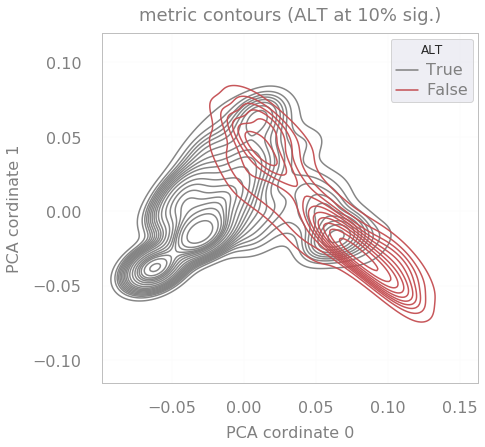

In [240]:
def varname(x):
    if x:
        return 'False'
    return 'True'
plt.style.use('fivethirtyeight')
fig=plt.figure(figsize=[6,6])
sns.set()

ax=plt.gca()

pf=pd.DataFrame(ef,columns=['X','Y']).assign(ido=cf.mdiss)
pf['ALT']=(pf.ido>threshold_p1)
pf['ALT']=[varname(x) for x in pf['ALT']]
ax=sns.kdeplot(x='X',y='Y',fill=False,data=pf,alpha=.95,lw=2,levels=20,thresh=.05,hue='ALT',palette=['.5','r'],fontsize=16)
legend=ax.get_legend()

ax.set_title('metric contours (ALT at 10% sig.)',fontsize=18,y=1.02,color='.5')
plt.setp(ax.get_xticklabels(), fontsize=16,y=-.02)
plt.setp(ax.get_yticklabels(), fontsize=16)
#plt.setp(ax2.get_yticklabels(), fontsize=16)
#plt.gca().set_xlabel('% reduction in error', fontsize=16,color='.5')
ax.set_facecolor((1.0, 0.47, 0.42,0))
fig.set_facecolor((1,0,1,0))
ax.spines['bottom'].set_color('.75')
ax.spines['top'].set_color('.75') 
ax.spines['right'].set_color('.75')
ax.spines['left'].set_color('.75')
##ax.set_xlim(-100,100);
ax.grid(color='#dddddd', linestyle='--', linewidth=.1)
plt.setp(ax.spines.values(), linewidth=1)
ax.tick_params(axis='x', colors='.5')    #setting up X-axis tick color to red
ax.tick_params(axis='y', colors='.5',pad=15)  #setting up Y-axis tick color to black
ax.set_ylabel('PCA cordinate 1',fontsize=16,color='.5',labelpad=10)
ax.set_xlabel('PCA cordinate 0',fontsize=16,color='.5',labelpad=10)
#ax.legend(fontsize=16)
for text in legend.get_texts():
    text.set_color(".5")
    text.set_fontsize(16)


plt.savefig(OUTPUTDIR+'dxcontour_diss_p10'+'.png',dpi=600,bbox_inches='tight',transparent=True)

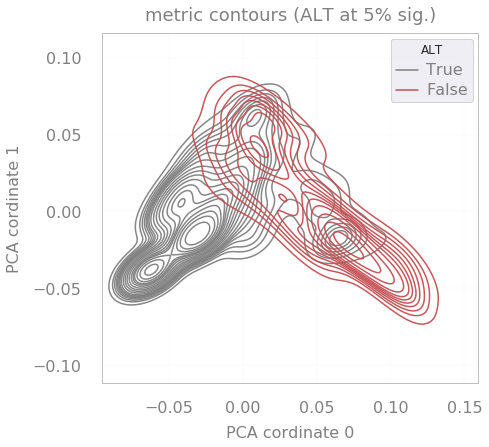

In [239]:
plt.style.use('fivethirtyeight')
fig=plt.figure(figsize=[6,6])
sns.set()

ax=plt.gca()

pf=pd.DataFrame(ef,columns=['X','Y']).assign(ido=cf.mdiss)
pf['ALT']=(pf.ido>threshold_p05)
pf['ALT']=[varname(x) for x in pf['ALT']]
ax=sns.kdeplot(x='X',y='Y',fill=False,data=pf,alpha=.95,lw=2,levels=20,thresh=.05,hue='ALT',palette=['.5','r'],fontsize=16)
legend=ax.get_legend()
ax.set_title('metric contours (ALT at 5% sig.)',fontsize=18,y=1.02,color='.5')
plt.setp(ax.get_xticklabels(), fontsize=16,y=-.02)
plt.setp(ax.get_yticklabels(), fontsize=16)
#plt.setp(ax2.get_yticklabels(), fontsize=16)
#plt.gca().set_xlabel('% reduction in error', fontsize=16,color='.5')
ax.set_facecolor((1.0, 0.47, 0.42,0))
fig.set_facecolor((1,0,1,0))
ax.spines['bottom'].set_color('.75')
ax.spines['top'].set_color('.75') 
ax.spines['right'].set_color('.75')
ax.spines['left'].set_color('.75')
##ax.set_xlim(-100,100);
ax.grid(color='#dddddd', linestyle='--', linewidth=.1)
plt.setp(ax.spines.values(), linewidth=1)
ax.tick_params(axis='x', colors='.5')    #setting up X-axis tick color to red
ax.tick_params(axis='y', colors='.5',pad=15)  #setting up Y-axis tick color to black
ax.set_ylabel('PCA cordinate 1',fontsize=16,color='.5',labelpad=10)
ax.set_xlabel('PCA cordinate 0',fontsize=16,color='.5',labelpad=10)
#ax.legend(fontsize=16)
for text in legend.get_texts():
    text.set_color(".5")
    text.set_fontsize(16)


plt.savefig(OUTPUTDIR+'dxcontour_diss_p05'+'.png',dpi=600,bbox_inches='tight',transparent=True)

In [43]:
dd=dissonance_duration[(dissonance_duration.duration<25) & (dissonance_duration.dissonance>0)]
print('Correlation between mean dissonance and duration')
display(dd.corr())
dd.corr().to_csv('corr_mdiss_dur.csv')



Correlation between mean dissonance and duration


,dissonance,duration
dissonance,1.000000,0.099331
duration,0.099331,1.000000


In [44]:
nH=5
print('Item Indices getting dissonance >= random:\n ',DSs.head(nH).index.values)
DissH=Diss[DSs.head(nH).index]
diss_arrayH=DissH.values.flatten()
duration_arrayH=dur[DSs.head().index].values.flatten()
ddH=pd.DataFrame([diss_arrayH,duration_arrayH],index=['dissonance','duration']).transpose().dropna()
ddH=ddH[(ddH.dissonance>0) & (ddH.duration<40)]
print('\ncorrelation:')
display(ddH.corr())


Item Indices getting dissonance >= random:
  ['6421' '6319' '6399' '6317' '6409']

correlation:


,dissonance,duration
dissonance,1.000000,0.121658
duration,0.121658,1.000000


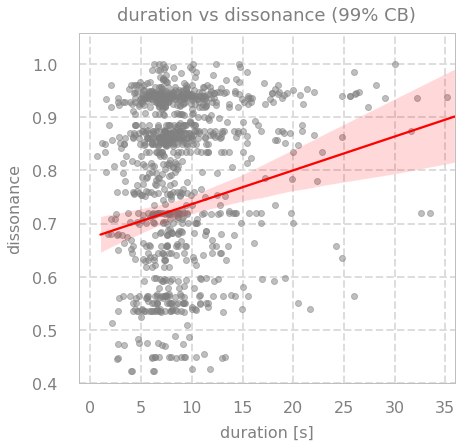

In [237]:
plt.style.use('fivethirtyeight')
fig=plt.figure(figsize=[6,6])
sns.set()
ax=sns.regplot(x='duration',y='dissonance',data=ddH,lowess=False,
               order=1,x_jitter=1,ci=99,
               scatter_kws={"color": ".5",'alpha':.5}, line_kws={"color": "red"})
ax.set_ylim(.4,None)

ax.set_title('duration vs dissonance (99% CB)',fontsize=18,y=1.02,color='.5')
plt.setp(ax.get_xticklabels(), fontsize=16,y=-.02)
plt.setp(ax.get_yticklabels(), fontsize=16)
#plt.setp(ax2.get_yticklabels(), fontsize=16)
#plt.gca().set_xlabel('% reduction in error', fontsize=16,color='.5')
ax.set_facecolor((1.0, 0.47, 0.42,0))
fig.set_facecolor((1,0,1,0))
ax.spines['bottom'].set_color('.75')
ax.spines['top'].set_color('.75') 
ax.spines['right'].set_color('.75')
ax.spines['left'].set_color('.75')
##ax.set_xlim(-100,100);
ax.grid(color='#dddddd', linestyle='--', linewidth=2)
plt.setp(ax.spines.values(), linewidth=1)
ax.tick_params(axis='x', colors='.5')    #setting up X-axis tick color to red
ax.tick_params(axis='y', colors='.5',pad=15)  #setting up Y-axis tick color to black
ax.set_ylabel('dissonance',fontsize=16,color='.5',labelpad=10)
ax.set_xlabel('duration [s]',fontsize=16,color='.5',labelpad=10)
#ax.legend(fontsize=16)


plt.savefig(OUTPUTDIR+'durvsdiss'+'.png',dpi=600,bbox_inches='tight',transparent=True)

In [46]:
# Q-correction via Q-sampling

In [157]:
Nsteps=40
Xc=[]
for s in X:
    Xc=np.append(Xc,qsample(s,qnet,Nsteps,nullbp))
Xc=Xc.reshape(len(Xc)//45,45)

In [158]:
# compute dissonance for random responses
samples=Xc
from pqdm.processes import pqdm                                                                     
DissC=pqdm(range(len(Xc)), getDissonance, n_jobs=12)                                                              
DissC=pd.DataFrame(DissC)

In [159]:
DissC.columns=COLS

In [160]:
CORR=True

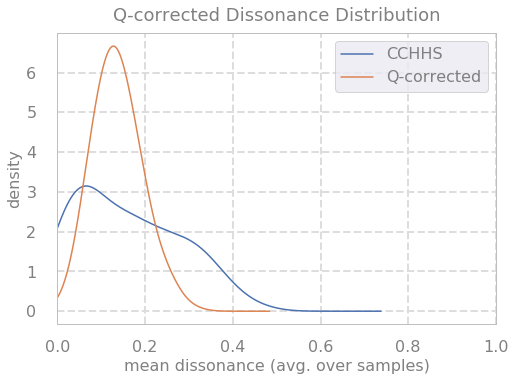

In [238]:
fig=plt.figure(figsize=[7,5])
sns.set()

ax=plt.gca()


#Dissj.mean(axis=1).plot.kde(bw_method=0.25,lw=3,label='JAIL')
#Diss.mean(axis=1).plot.kde(ax=ax,bw_method=0.25,lw=3,label='SA')
DS=pd.DataFrame(Diss.mean(axis=1),columns=['CCHHS']).join(
    pd.DataFrame(DissC.mean(axis=1),columns=['CORR']))

DSTD=pd.DataFrame(Diss.std(axis=1),columns=['CCHHS']).join(
    pd.DataFrame(DissC.std(axis=1),columns=['CORR']))

DS=DS.join(DSTD,rsuffix='_std').dropna()

#DS=DS.assign(delta=DS.SA-DS.JAIL)


ax=DS.CCHHS.plot.kde(bw_method=.35)
#DS.JAIL.plot.kde(ax=ax,bw_method=.2)
DS.CORR.plot.kde(ax=ax,bw_method=.5)
ax.set_xlim(0,1)


ax.set_title('Q-corrected Dissonance Distribution',fontsize=18,y=1.02,color='.5')
plt.setp(ax.get_xticklabels(), fontsize=16,y=-.02)
plt.setp(ax.get_yticklabels(), fontsize=16)
ax.set_facecolor((1.0, 0.47, 0.42,0))
fig.set_facecolor((1,0,1,0))
ax.spines['bottom'].set_color('.75')
ax.spines['top'].set_color('.75') 
ax.spines['right'].set_color('.75')
ax.spines['left'].set_color('.75')
ax.grid(color='#dddddd', linestyle='--', linewidth=2)
plt.setp(ax.spines.values(), linewidth=1)
ax.tick_params(axis='x', colors='.5')    #setting up X-axis tick color to red
ax.tick_params(axis='y', colors='.5',pad=15)  #setting up Y-axis tick color to black
#plt.gca().set_xlim(-.1,.4)
ax.set_ylabel('density',fontsize=16,color='.5')
ax.set_xlabel('mean dissonance (avg. over samples)',fontsize=16,color='.5')
legend=ax.legend(['CCHHS','Q-corrected'],fontsize=16)

for text in legend.get_texts():
    text.set_color(".5")
    text.set_fontsize(16)


plt.savefig(PREF+'dissonance_distC30'+'.png',dpi=600,bbox_inches='tight',transparent=True)

In [163]:
# the "lying" samples at 5 and 10% significance post correction
mDissC=DissC.mean(axis=1).sort_values(ascending=False)
print('95% \n',mDissC[mDissC>threshold_p05])
print('90% \n',mDissC[mDissC>threshold_p1])

95% 
 417     0.322520
41      0.311944
1122    0.310722
275     0.305745
1248    0.303052
          ...   
2       0.222736
344     0.222591
336     0.221814
1164    0.221529
240     0.221020
Length: 97, dtype: float64
90% 
 417     0.322520
41      0.311944
1122    0.310722
275     0.305745
1248    0.303052
260     0.300698
408     0.283563
749     0.281897
1198    0.280230
810     0.274225
709     0.273112
1236    0.272099
570     0.271964
890     0.271655
102     0.271139
193     0.269794
1100    0.268600
87      0.267008
746     0.266887
930     0.266478
628     0.266171
897     0.265111
750     0.265019
dtype: float64


In [164]:
mDissC.loc[171]

0.18074687988453042

In [165]:
mDissC.loc[1219]

0.1634207855262155

In [166]:
# generate distanec matrix
if CORR:
    H=qdistance_matrix(Xc,Xc, qnet, qnet)
    pd.DataFrame(H).to_csv(OUTPUTDIR+'HMATcorr40.csv',index=None,header=None,sep=' ')
    H.shape

In [167]:
# calculate sippl embedding
PREF=OUTPUTDIR
FILEc='HMATcorr40.csv'
DATAFILEc=PREF+FILEc
EFILEc=PREF+'_Eb1c_'
DFILEc=PREF+'_Db1c_'
PCAEFILEc=PREF+'_PEb1c_'

if CORR:
    STR=EMBED+' -f '+DATAFILEc+' -E '+EFILEc+' -D '+DFILEc
    subprocess.call(STR,shell=True);

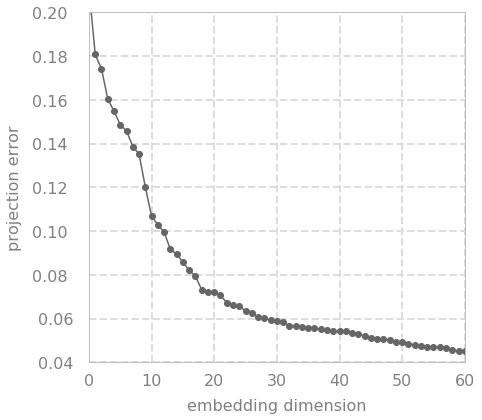

In [287]:
# plot dimensional error
# plot dimensional error
plt.style.use('fivethirtyeight')
fig=plt.figure(figsize=[6,6])
ax=plt.gca()
sns.set()
ax=pd.read_csv(DFILEc,sep=' ',
               header=None).transpose(
    ).plot(ax=ax,style='-ko',c='.4')
ax.set_ylim(4e-2,2e-1)
ax.set_xlim(0,60)

plt.setp(ax.get_xticklabels(), fontsize=16,y=-.02)
plt.setp(ax.get_yticklabels(), fontsize=16)
ax.set_facecolor((1.0, 0.47, 0.42,0))
fig.set_facecolor((1,0,1,0))
ax.spines['bottom'].set_color('.75')
ax.spines['top'].set_color('.75') 
ax.spines['right'].set_color('.75')
ax.spines['left'].set_color('.75')
ax.grid(color='#dddddd', linestyle='--', linewidth=2)
plt.setp(ax.spines.values(), linewidth=1)
ax.tick_params(axis='x', colors='.5')    #setting up X-axis tick color to red
ax.tick_params(axis='y', colors='.5',pad=15)  #setting up Y-axis tick color to black
l=ax.legend(['dimensional error'],fontsize=16)
l.remove()
ax.set_ylabel('projection error',fontsize=16,color='.5',labelpad=10)
ax.set_xlabel('embedding dimension',fontsize=16,color='.5',labelpad=10)

   
plt.savefig(OUTPUTDIR+'emderrorCorr'+'.png',dpi=600,bbox_inches='tight',transparent=True)    

In [169]:
# get embedding matrix
Ec=pd.read_csv(EFILEc,sep=' ',header=None).dropna(axis=1).transpose()
Ec.columns=['x'+str(i) for i in Ec.columns]
Ec.to_csv(PREF+'Eb1c.csv')

In [170]:
Efc=pd.read_csv(EFILEc,sep=' ',header=None).dropna(axis=1).transpose()
Efc.columns=['x'+str(i) for i in Efc.columns]
xfc=Efc#.assign(IF=dx.ido)

pcac = PCA(n_components=2).fit(xfc)
efc=pca.fit_transform(xfc)

pd.DataFrame(efc).to_csv(PCAEFILEc,header=None,index=None)

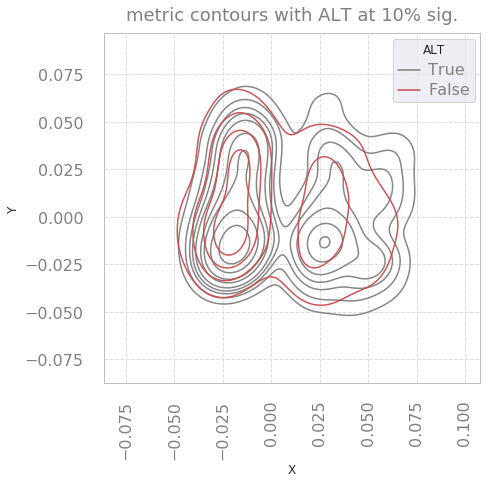

In [294]:
plt.style.use('fivethirtyeight')
fig=plt.figure(figsize=[6,6])
sns.set()

ax=plt.gca()

pf=pd.DataFrame(efc,columns=['X','Y']).assign(ido=cf.mdiss)
pf['ALT']=(pf.ido>threshold_p1)
pf['ALT']=[varname(x) for x in pf['ALT']]
ax=sns.kdeplot(ax=ax,x='X',y='Y',fill=False,data=pf,alpha=.95,lw=4,levels=10,thresh=.05,hue='ALT',palette=['.5','r'],fontsize=16)
legend = ax.get_legend()
ax.set_title('metric contours with ALT at 10% sig.',fontsize=18,y=1.02,color='.5')
plt.setp(ax.get_xticklabels(), fontsize=16,y=-.02,rotation=90)
plt.setp(ax.get_yticklabels(), fontsize=16)
ax.set_facecolor((1.0, 0.47, 0.42,0))
fig.set_facecolor((1,0,1,0))
ax.spines['bottom'].set_color('.75')
ax.spines['top'].set_color('.75') 
ax.spines['right'].set_color('.75')
ax.spines['left'].set_color('.75')
ax.grid(color='#dddddd', linestyle='--', linewidth=1)
plt.setp(ax.spines.values(), linewidth=1)
ax.tick_params(axis='x', colors='.5')    #setting up X-axis tick color to red
ax.tick_params(axis='y', colors='.5',pad=15)  #setting up Y-axis tick color to black
#ax.set_xlim(-0.07,0.09)
#ax.set_ylim(-0.07,0.09)

for text in legend.get_texts():
    text.set_color(".5")
    text.set_fontsize(16)
    
plt.savefig(OUTPUTDIR+'dxcontour_diss_p10_corr'+'.png',
            dpi=600,bbox_inches='tight',transparent=True)

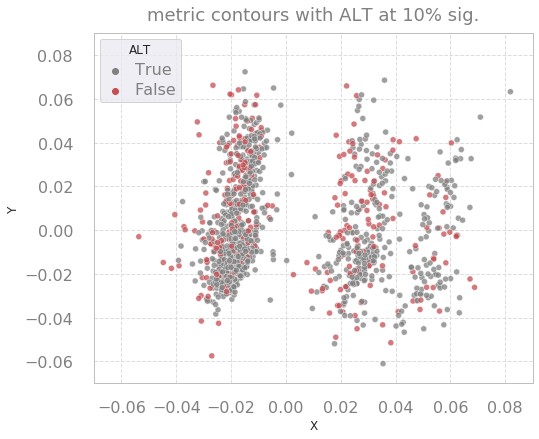

In [234]:
plt.style.use('fivethirtyeight')
fig=plt.figure(figsize=[7,6])
sns.set()

ax=plt.gca()

pf=pd.DataFrame(efc,columns=['X','Y']).assign(ido=cf.mdiss)
pf['ALT']=(pf.ido>threshold_p1)
pf['ALT']=[varname(x) for x in pf['ALT']]
ax=sns.scatterplot(x='X',y='Y',data=pf,alpha=.75,hue='ALT',palette=['.5','r'])
legend = ax.get_legend()

ax.set_title('metric contours with ALT at 10% sig.',fontsize=18,y=1.02,color='.5')
plt.setp(ax.get_xticklabels(), fontsize=16,y=-.02)
plt.setp(ax.get_yticklabels(), fontsize=16)
ax.set_facecolor((1.0, 0.47, 0.42,0))
fig.set_facecolor((1,0,1,0))
ax.spines['bottom'].set_color('.75')
ax.spines['top'].set_color('.75') 
ax.spines['right'].set_color('.75')
ax.spines['left'].set_color('.75')
ax.grid(color='#dddddd', linestyle='--', linewidth=1)
plt.setp(ax.spines.values(), linewidth=1)
ax.tick_params(axis='x', colors='.5')    #setting up X-axis tick color to red
ax.tick_params(axis='y', colors='.5',pad=15)  #setting up Y-axis tick color to black
ax.set_xlim(-0.07,0.09)
ax.set_ylim(-0.07,0.09)

for text in legend.get_texts():
    text.set_color(".5")
    text.set_fontsize(16)


plt.savefig(OUTPUTDIR+'dxscatter_diss_p10_corr'+'.png',
            dpi=600,bbox_inches='tight',transparent=True)

In [ ]:
#--------------------------------------------------